In [13]:
import glob
from typing import Dict
import numpy as np

from model_training.cnn_classifier import CNNClassifier
from model_training.architectures.simple_convolution_network import SimpleConvolutionArchitecture

In [20]:
ARCHITRECTURE = SimpleConvolutionArchitecture()
FOLDER_PATH = "../models/simple_CNN_spectrograms_cleaned_and_sharpened"
DATASET = "../data/tsrc_spectrograms_cleaned_sharpened"

In [21]:
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)
model.fit(
    f"{DATASET}/train", 
    f"{DATASET}/validation",
    batch_size=32,
    n_epochs=10,
)

Running training on GPU...


 10%|█         | 1/10 [17:22<2:36:21, 1042.33s/it]

Epoch 0 Done after 1042.3325972557068 seconds


 20%|██        | 2/10 [26:58<1:42:24, 768.02s/it] 

Epoch 1 Done after 575.9984455108643 seconds


 30%|███       | 3/10 [36:16<1:18:26, 672.32s/it]

Epoch 2 Done after 558.4276928901672 seconds


 40%|████      | 4/10 [45:56<1:03:33, 635.65s/it]

Epoch 3 Done after 579.4494533538818 seconds


 50%|█████     | 5/10 [55:22<50:53, 610.69s/it]  

Epoch 4 Done after 566.424688577652 seconds


 60%|██████    | 6/10 [1:05:03<40:01, 600.44s/it]

Epoch 5 Done after 580.5363023281097 seconds


 70%|███████   | 7/10 [1:15:03<30:01, 600.47s/it]

Epoch 6 Done after 600.5197010040283 seconds


 80%|████████  | 8/10 [1:24:38<19:44, 592.35s/it]

Epoch 7 Done after 574.9586570262909 seconds


 80%|████████  | 8/10 [1:26:37<21:39, 649.73s/it]


KeyboardInterrupt: 

In [ ]:
import os
from typing import List

from matplotlib import pyplot as plt


def get_true_and_predicted_labels(model : CNNClassifier, path: str) -> Dict[str, int]:
    true_labels = get_true_labels(path)
    predictions = model.predict(path)

    y_true = []
    y_pred = []

    for file in true_labels:
        y_true.append(true_labels[file])
        y_pred.append(predictions[file])

    return y_true, y_pred

def get_true_labels(path: str) -> Dict[str, int]: 

    file_dicionary = {}

    for index, word in enumerate(os.listdir(path)):
        for file in glob.glob(f"{path}\\{word}\\*.png"):
            file_dicionary[file] = index

    return file_dicionary

def accuracy(y_true: List[int], y_pred: List[int]) -> float:
    correct = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    return correct / len(y_true)

def get_labels_of(y_true , y_pred , i):
    new_true , new_pred = [] , []

    for true in y_true:
        if(true == i):
            new_true.append(1)
        else:
            new_true.append(0)

    for  pred in y_pred:
        if(pred == i):
            new_pred.append(1)
        else:
            new_pred.append(0)
    
    

    return new_true , new_pred

def f1_score_for_double(y_true: List[int], y_pred: List[int]):
    confusion = confusion_matrix(y_true, y_pred)
    
    tp = confusion[1, 1]
    fp = confusion[0, 1]
    fn = confusion[1, 0]
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    

    return precision , recall


def f1_score(y_true: List[int], y_pred: List[int]) -> float:

    sum_score = 0
    leng = len(y_true)
    for i in range(0 , leng):
        new_true , new_pred = get_labels_of(y_true , y_pred , i)

        prec , reca = f1_score_for_double(new_true , new_pred)

        sum_score += 2 * (prec * reca) / (prec + reca)

    return sum_score / leng

def confusion_matrix(y_true: List[int], y_pred: List[int]):
    n_classes = len(set(y_true))
    confusion = np.zeros((n_classes, n_classes))
    
    for true, pred in zip(y_true, y_pred):
        confusion[true, pred] += 1
        
    return confusion

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(True)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [26]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET}/test")

In [36]:
print(f"Accuracy: {accuracy(y_true, y_pred)}")
print(f"F1 Score: {f1_score(y_true, y_pred)}")

Accuracy: 0.8465747091007166
F1 Score: 0.9733333333333334


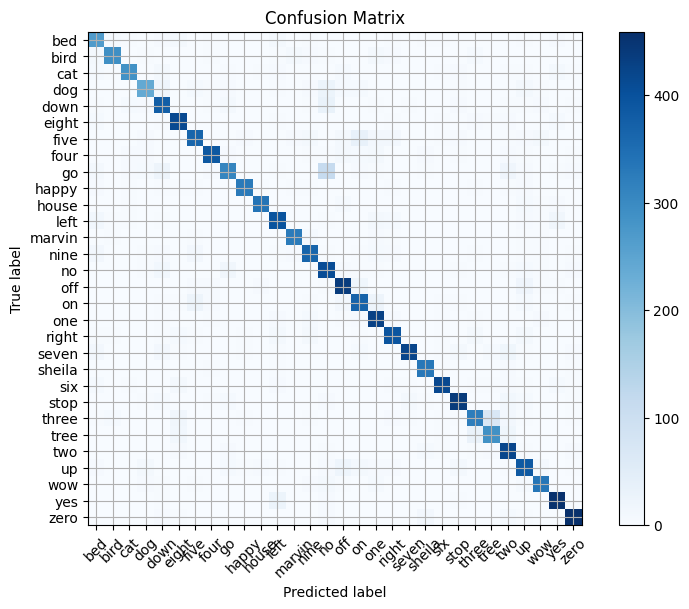

In [35]:
plot_confusion_matrix(confusion_matrix(y_true, y_pred), os.listdir(f"{DATASET}/train"))

(array([ 25.,   0.,  71.,   0.,   0., 149.,   0., 232.,   0.,   0., 347.,
          0.,   0., 280.,   0., 205.,   0.,   0.,  80.,   0.,  26.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   3.,   0.,
          1.,   0.,   0.,   7.,   0., 124.]),
 array([15.        , 15.38461538, 15.76923077, 16.15384615, 16.53846154,
        16.92307692, 17.30769231, 17.69230769, 18.07692308, 18.46153846,
        18.84615385, 19.23076923, 19.61538462, 20.        , 20.38461538,
        20.76923077, 21.15384615, 21.53846154, 21.92307692, 22.30769231,
        22.69230769, 23.07692308, 23.46153846, 23.84615385, 24.23076923,
        24.61538462, 25.        , 25.38461538, 25.76923077, 26.15384615,
        26.53846154, 26.92307692, 27.30769231, 27.69230769, 28.07692308,
        28.46153846, 28.84615385, 29.23076923, 29.61538462, 30.        ]),
 <BarContainer object of 39 artists>)

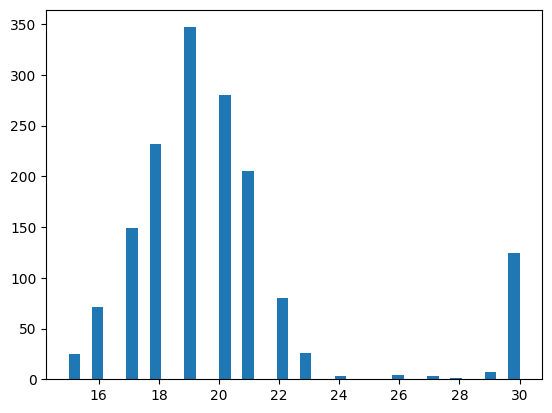

In [8]:
import glob
from typing import Dict, List

from matplotlib import pyplot as plt
from numpy import sqrt


files = glob.glob("../data/tsrc_train_test/train/**/*_nohash_0.wav", recursive=True)
speaker_id_to_files: Dict[str, List[str]] = {}

for file in files:
    speaker_id = file.split("\\")[-1].split("_")[-3]
    if speaker_id not in speaker_id_to_files:
        speaker_id_to_files[speaker_id] = []
    speaker_id_to_files[speaker_id].append(file)


file_occurances = [len(files) for files in speaker_id_to_files.values()]
plt.hist(file_occurances, bins=int(sqrt(len(file_occurances))))